# Urban Farming in Milan, Italy
# Problem Statement


1. Identify Crops suitable for Urban farming inlcuing environmental, climatic conditions in urban areas.

2. Develop an algorithm that takes into account the environmental conditions, location, and available infrastructure to predict the potential growth of crops in urban areas. The algorithm should analyze facltors such as sunlight exposure, soil quality, water availability, and temperature to determine the most suitable crops for a specific urban farming site.

3. Address the risks associated with urban farming to ensure a successful and sustainable operation. Minimise potential risks related to urban agriculture, social and economic risks, including health risks from wastewater irrigation, trace metal, zoonotic risks, and other health risks. By identifying and mitigating these risks, we can suggest solutions to potential urban farmers to create a safe and productive environment for growing crops in urban settings.


# Data Collection
Data is collected from different sources for few vegetables, salads and fruits and synthetic data is generated considering the following features

Name
Min_temp(C)
Max_temp(C)
Rainfall(mm) Min
Rainfall(mm) Max
Ph(Min)
pH(Max)
Soil_Type
Fertility
Light_Hours(Min)
Light_Hours(Max)
Light_intensity(Min) (μmol·m−2·s−1)
Light_intensity(Max)(μmol·m−2·s−1)
Relative Humidity (%)
N-P-K Ratio
Season	      
Yield (100g/ha)


# Data Understanding and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import cm


#mount Gdrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the latest updated dataset into a dataframe for futher analysis
df=pd.read_csv("/content/drive/MyDrive/MachineLearningProjects/AgritechMilano/synthetic_fruit_normal_crop_data.csv")

# Drop the first column Serial No.
df.drop('S. no.', axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1500 non-null   object 
 1   Soil_Type        1500 non-null   object 
 2   Fertility        1500 non-null   object 
 3   Photoperiod      1500 non-null   object 
 4   N-P-K Ratio      1500 non-null   object 
 5   Temperature      1500 non-null   float64
 6   Rainfall         1500 non-null   float64
 7   pH               1500 non-null   float64
 8   Light_Hours      1500 non-null   float64
 9   Light_Intensity  1500 non-null   float64
 10  Rh               1500 non-null   float64
 11  Yield            1500 non-null   float64
 12  Season           1500 non-null   object 
dtypes: float64(7), object(6)
memory usage: 152.5+ KB


In [ ]:
df.shape


(1500, 13)



*   There are 1000 datapoints/rows and 13 features
*   Its observed that there are no null values/ missing values in the dataset
*   Among the features, the below features have Categorical values
      * Name
      * Soil_Type      
      * Fertility         
      * Photoperiod    
      * N-P-K Ratio
      * Season  



*   List item





In [ ]:
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
print(df_unique)


           Variable  DistinctCount
0              Name             15
1         Soil_Type              5
2         Fertility              3
3       Photoperiod              3
4       N-P-K Ratio              5
5       Temperature           1500
6          Rainfall           1500
7                pH           1500
8       Light_Hours           1500
9   Light_Intensity           1500
10               Rh           1500
11            Yield           1500
12           Season              7


In [ ]:
# Get numerical and categorical columns
# Display the count of unique values for Categorical Columns

# Remove leading and trailing spaces for values in Season column
df['Season'] = df['Season'].str.strip()

df_ = df.select_dtypes(exclude=['int', 'float'])
print('Categorical Columns:')
print()
for col in df_.columns:
    print(df_[col].value_counts()) # to print count of every category
    print("\n")

Categorical Columns:

Name
Apple          100
Orange         100
Pomegranate    100
Peach          100
Blueberry      100
Strawberry     100
Figs           100
Cherries       100
Lemon          100
Kiwi           100
Watermelon     100
Grapes         100
apricot        100
pear           100
plum           100
Name: count, dtype: int64


Soil_Type
Well-drained Loamy         600
Loamy                      500
Sandy Loam                 200
Fertile, Well-Drained      100
well drained sandy loam    100
Name: count, dtype: int64


Fertility
High        700
Moderate    600
moderate    200
Name: count, dtype: int64


Photoperiod
Short Day Period, Day Neutral                     1100
Short Day Period, Day Neutral, Long Day Period     300
Short Day Period                                   100
Name: count, dtype: int64


N-P-K Ratio
10-10-10    1000
5-10-5       200
20-10-20     100
5-10-10      100
6-6-6        100
Name: count, dtype: int64


Season
Summer                500
Winter/Spring/Fall

# Descriptive Statistics

In [ ]:
df.describe().T.round(decimals=2)


count     mean     std     min     25%      50%      75%  \
Temperature      1500.0    24.33    4.62   12.29   21.02    24.30    26.84   
Rainfall         1500.0  1132.75  386.58  519.81  815.18  1030.35  1306.64   
pH               1500.0     5.94    1.07    3.08    5.58     6.37     6.66   
Light_Hours      1500.0    12.59    1.60    6.15   12.64    12.95    13.24   
Light_Intensity  1500.0   479.75  217.13   79.41  271.33   505.37   664.00   
Rh               1500.0    91.33    2.20   84.98   90.22    92.11    92.87   
Yield            1500.0    12.31   11.01    0.88    5.24     8.92    16.79   

                     max  
Temperature        39.04  
Rainfall         2524.73  
pH                  7.80  
Light_Hours        16.72  
Light_Intensity  1023.12  
Rh                 94.83  
Yield              52.72

# Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.0% of the points cannot be plac

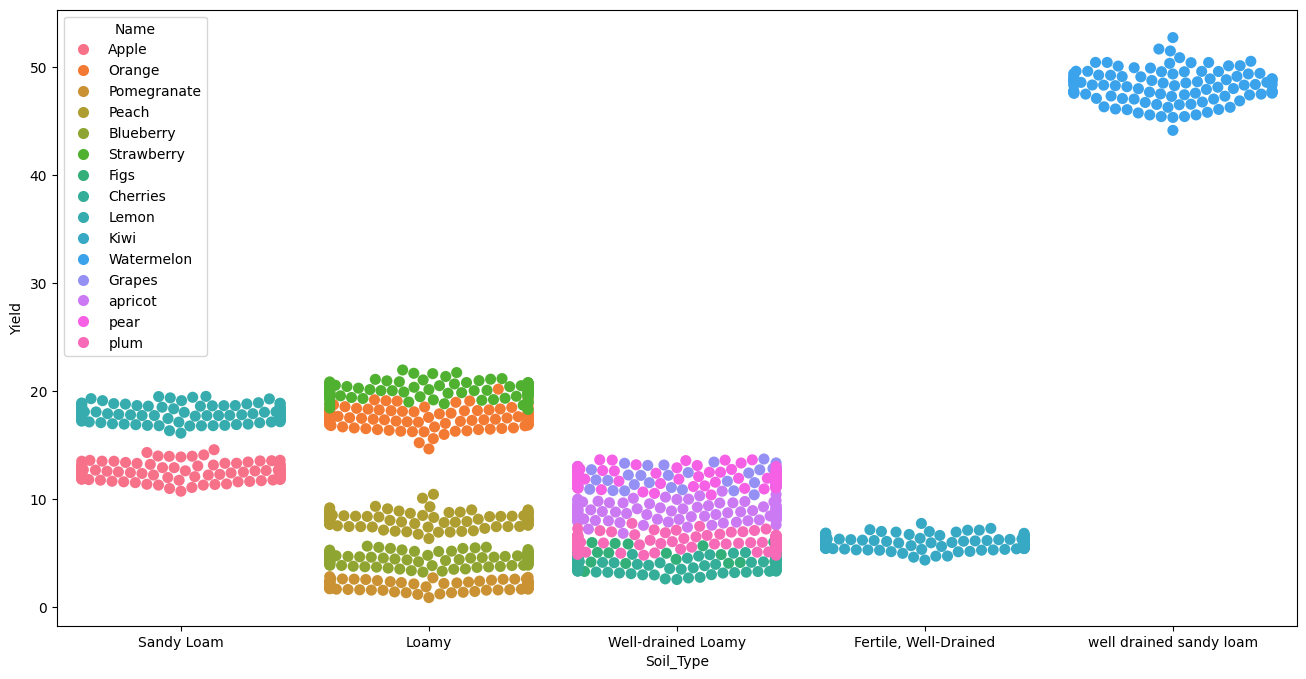

In [ ]:
# Understand the distribution of numeric feature Yield across other Categorical features for different crops
# plot the swarmplot
# size set to 8
# Set the width and height of the figure
plt.figure(figsize=(16,8))
sns.swarmplot(x ="Soil_Type", y = "Yield", hue='Name',
              data = df, size = 8)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


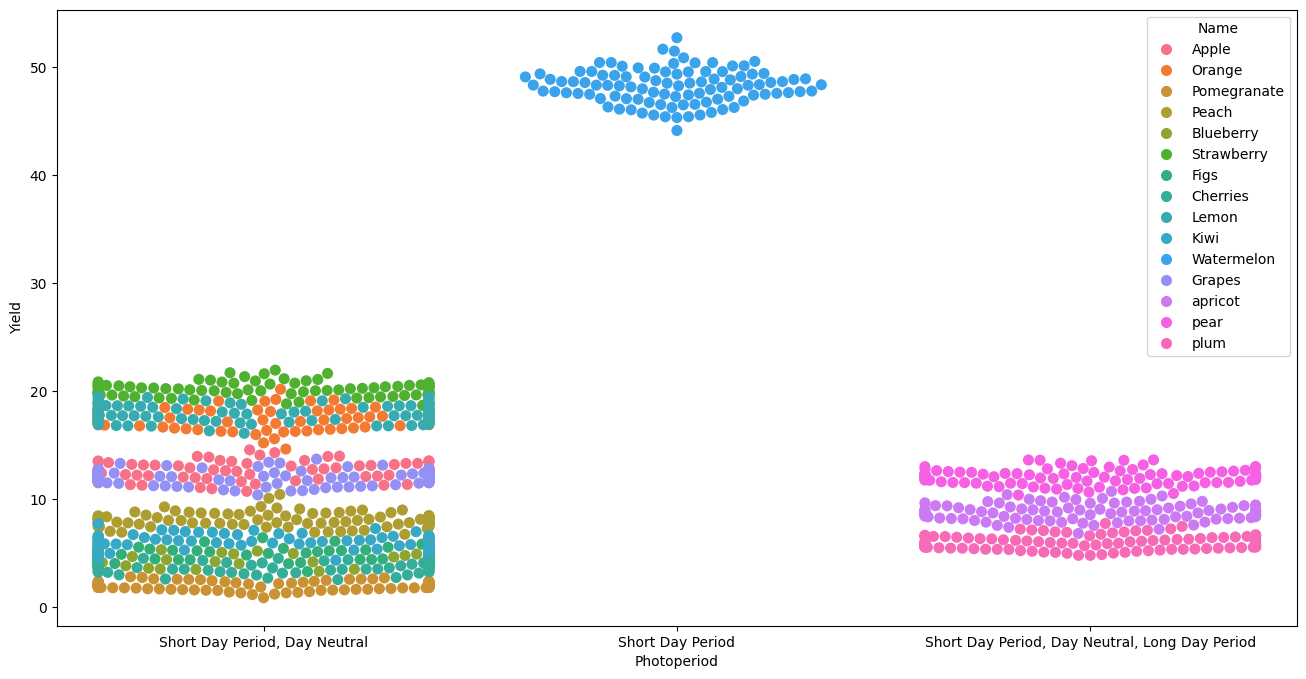

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
sns.swarmplot(x ="Photoperiod", y = "Yield", hue='Name',
              data = df, size = 8)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 41.0% of the points cannot be plac

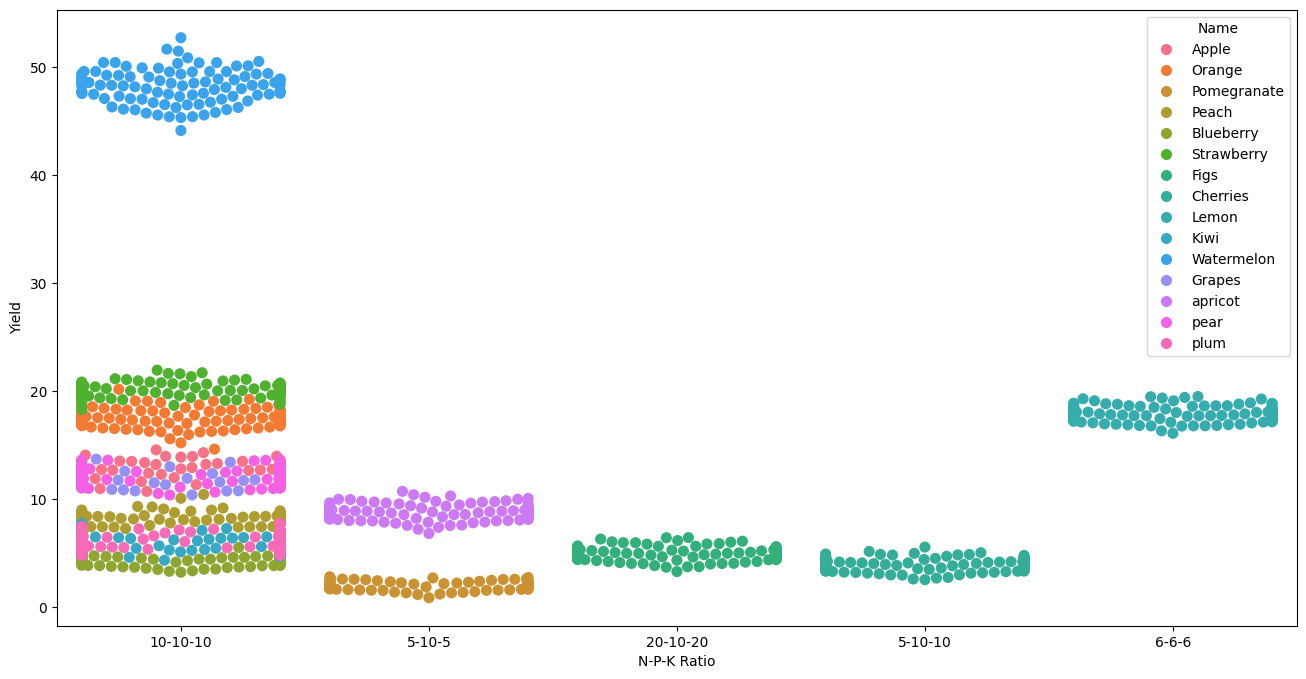

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
sns.swarmplot(x ="N-P-K Ratio", y = "Yield", hue='Name',
              data = df, size = 8)
plt.show()

<Figure size 1600x1000 with 0 Axes>

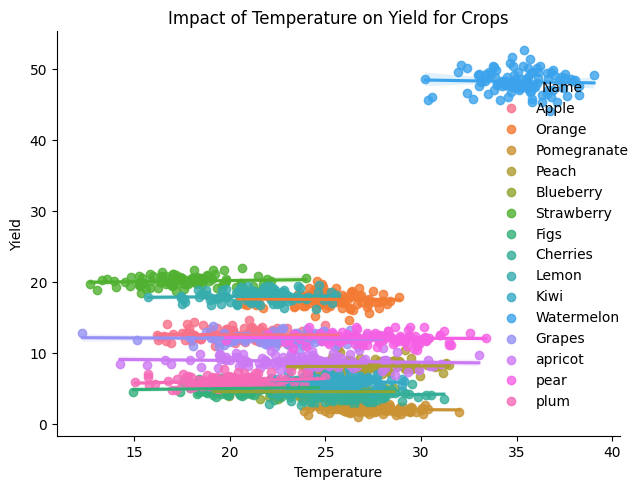

<Figure size 1600x1000 with 0 Axes>

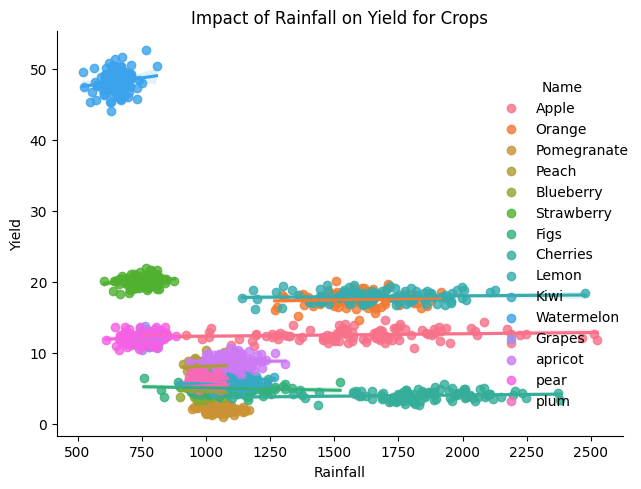

<Figure size 1600x1000 with 0 Axes>

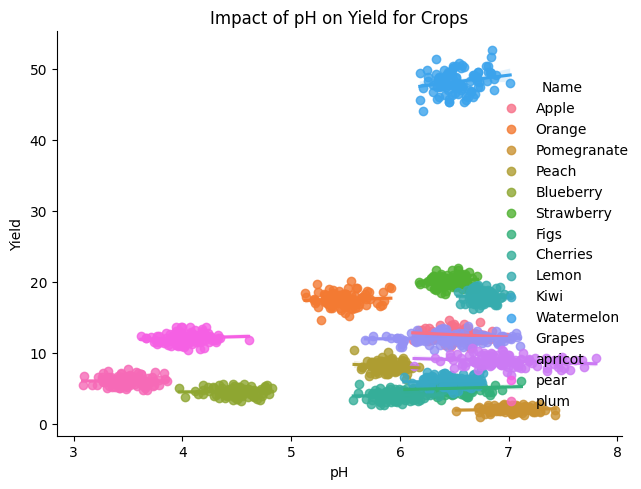

<Figure size 1600x1000 with 0 Axes>

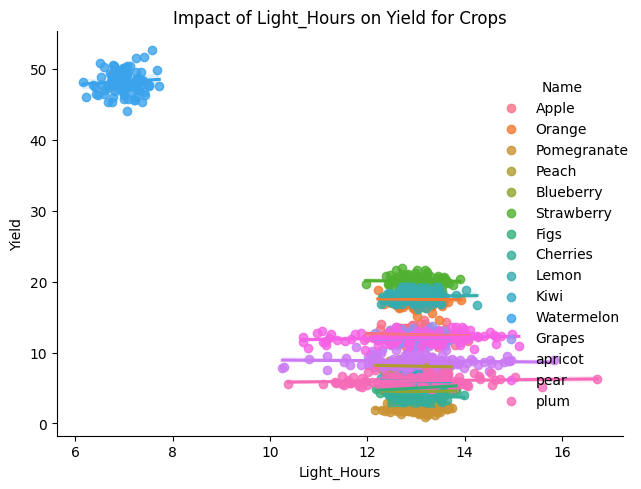

<Figure size 1600x1000 with 0 Axes>

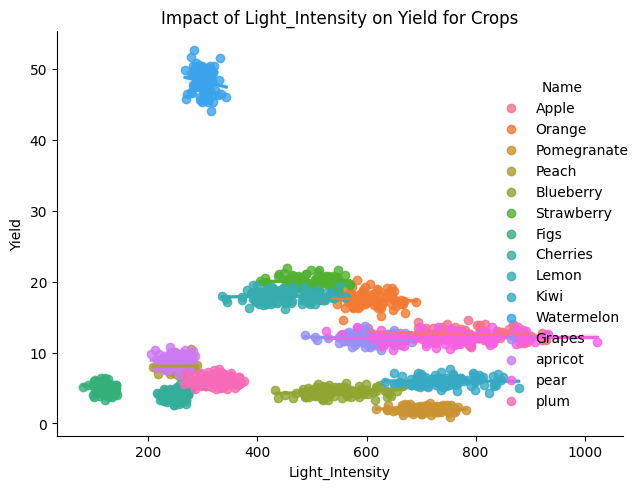

<Figure size 1600x1000 with 0 Axes>

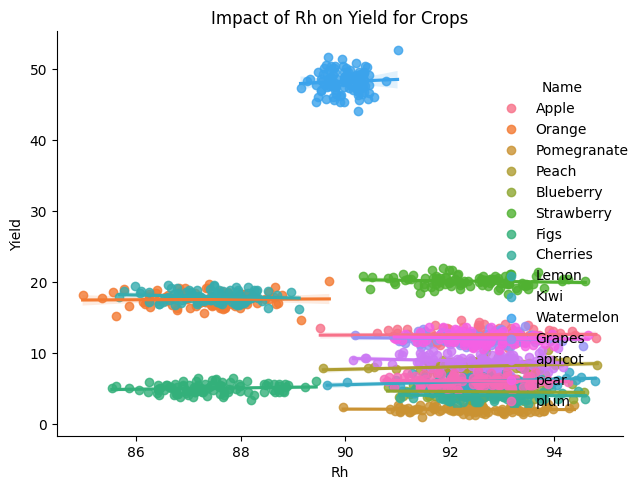

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float'])
for col in numerical_columns:
    if col != 'Yield':
      # Set the width and height of the figure
      plt.figure(figsize=(16,10))
      #  Influence of each feature on Crop Yield
      sns.lmplot(x=col, y='Yield', hue='Name', data=df, height=5)
      # Add title
      plt.title(f"Impact of {col} on Yield for Crops")
      plt.xlabel(f"{col}")
      plt.ylabel('Yield')
      plt.tight_layout()
      plt.show()


## Observations based on the above plots


1. Impact of Temperature on Crop Yield

    *   Watermelons prodcuce higher yield when the temperatures are between 30-40 degrees Celsius whereas all other fruits produce optimum yield when temperatures range between 15 - 30 degrees Celsius
    

2. Impact of Rainfall on Crop Yield

    *  Watermelons and Strawberry need less rainfall compared to other crops for producing optimum yield

3. Impact of Soil pH on Crops and its yield

    * Most of the fruit crops need slightly acidic to neutral pH with Watermelons producing optimum yield when soil pH is 6-7


4. Impact of Light Hours on different crops and its yield

    * Watermelons need less light hours of around 6-8 hours whereas other fruit crops need more light hours pf around 10-15

5. Impact of Light Intensity on Crops and its Yield

    * Figs and Strawbeery needs less light intensity whereas Pear needs more light intensity for its optimum yield


6. Impact of Relative Humidity (RH) on Crops and its Yield

    * Its observed that most of the fruit crops need RH of 90-94 for optimum yield



Text(0, 0.5, 'Yield')

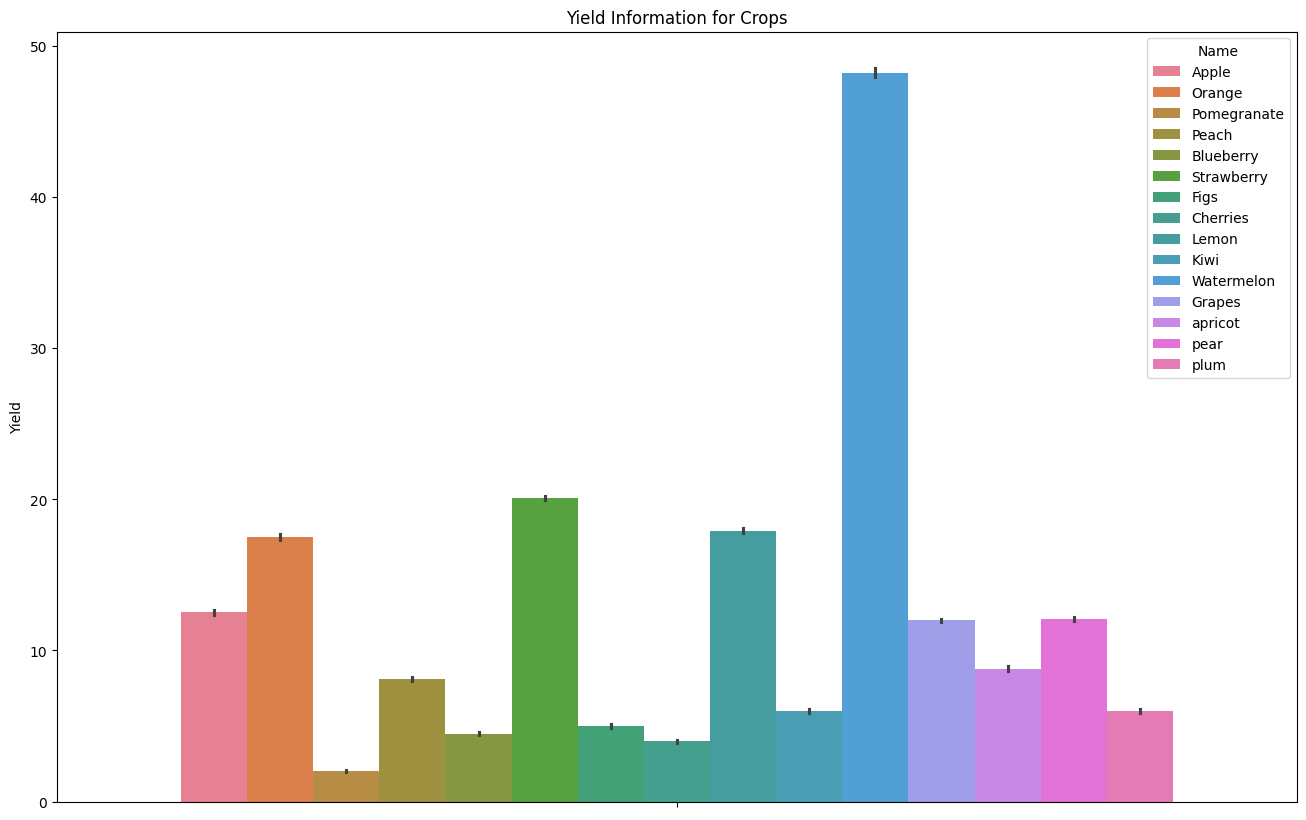

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,10))

# Add title
plt.title("Yield Information for Crops")

# Bar chart showing Yield details for different crops
sns.barplot(data=df, y=df['Yield'], hue='Name')

# Add label for vertical axis
plt.ylabel("Yield")

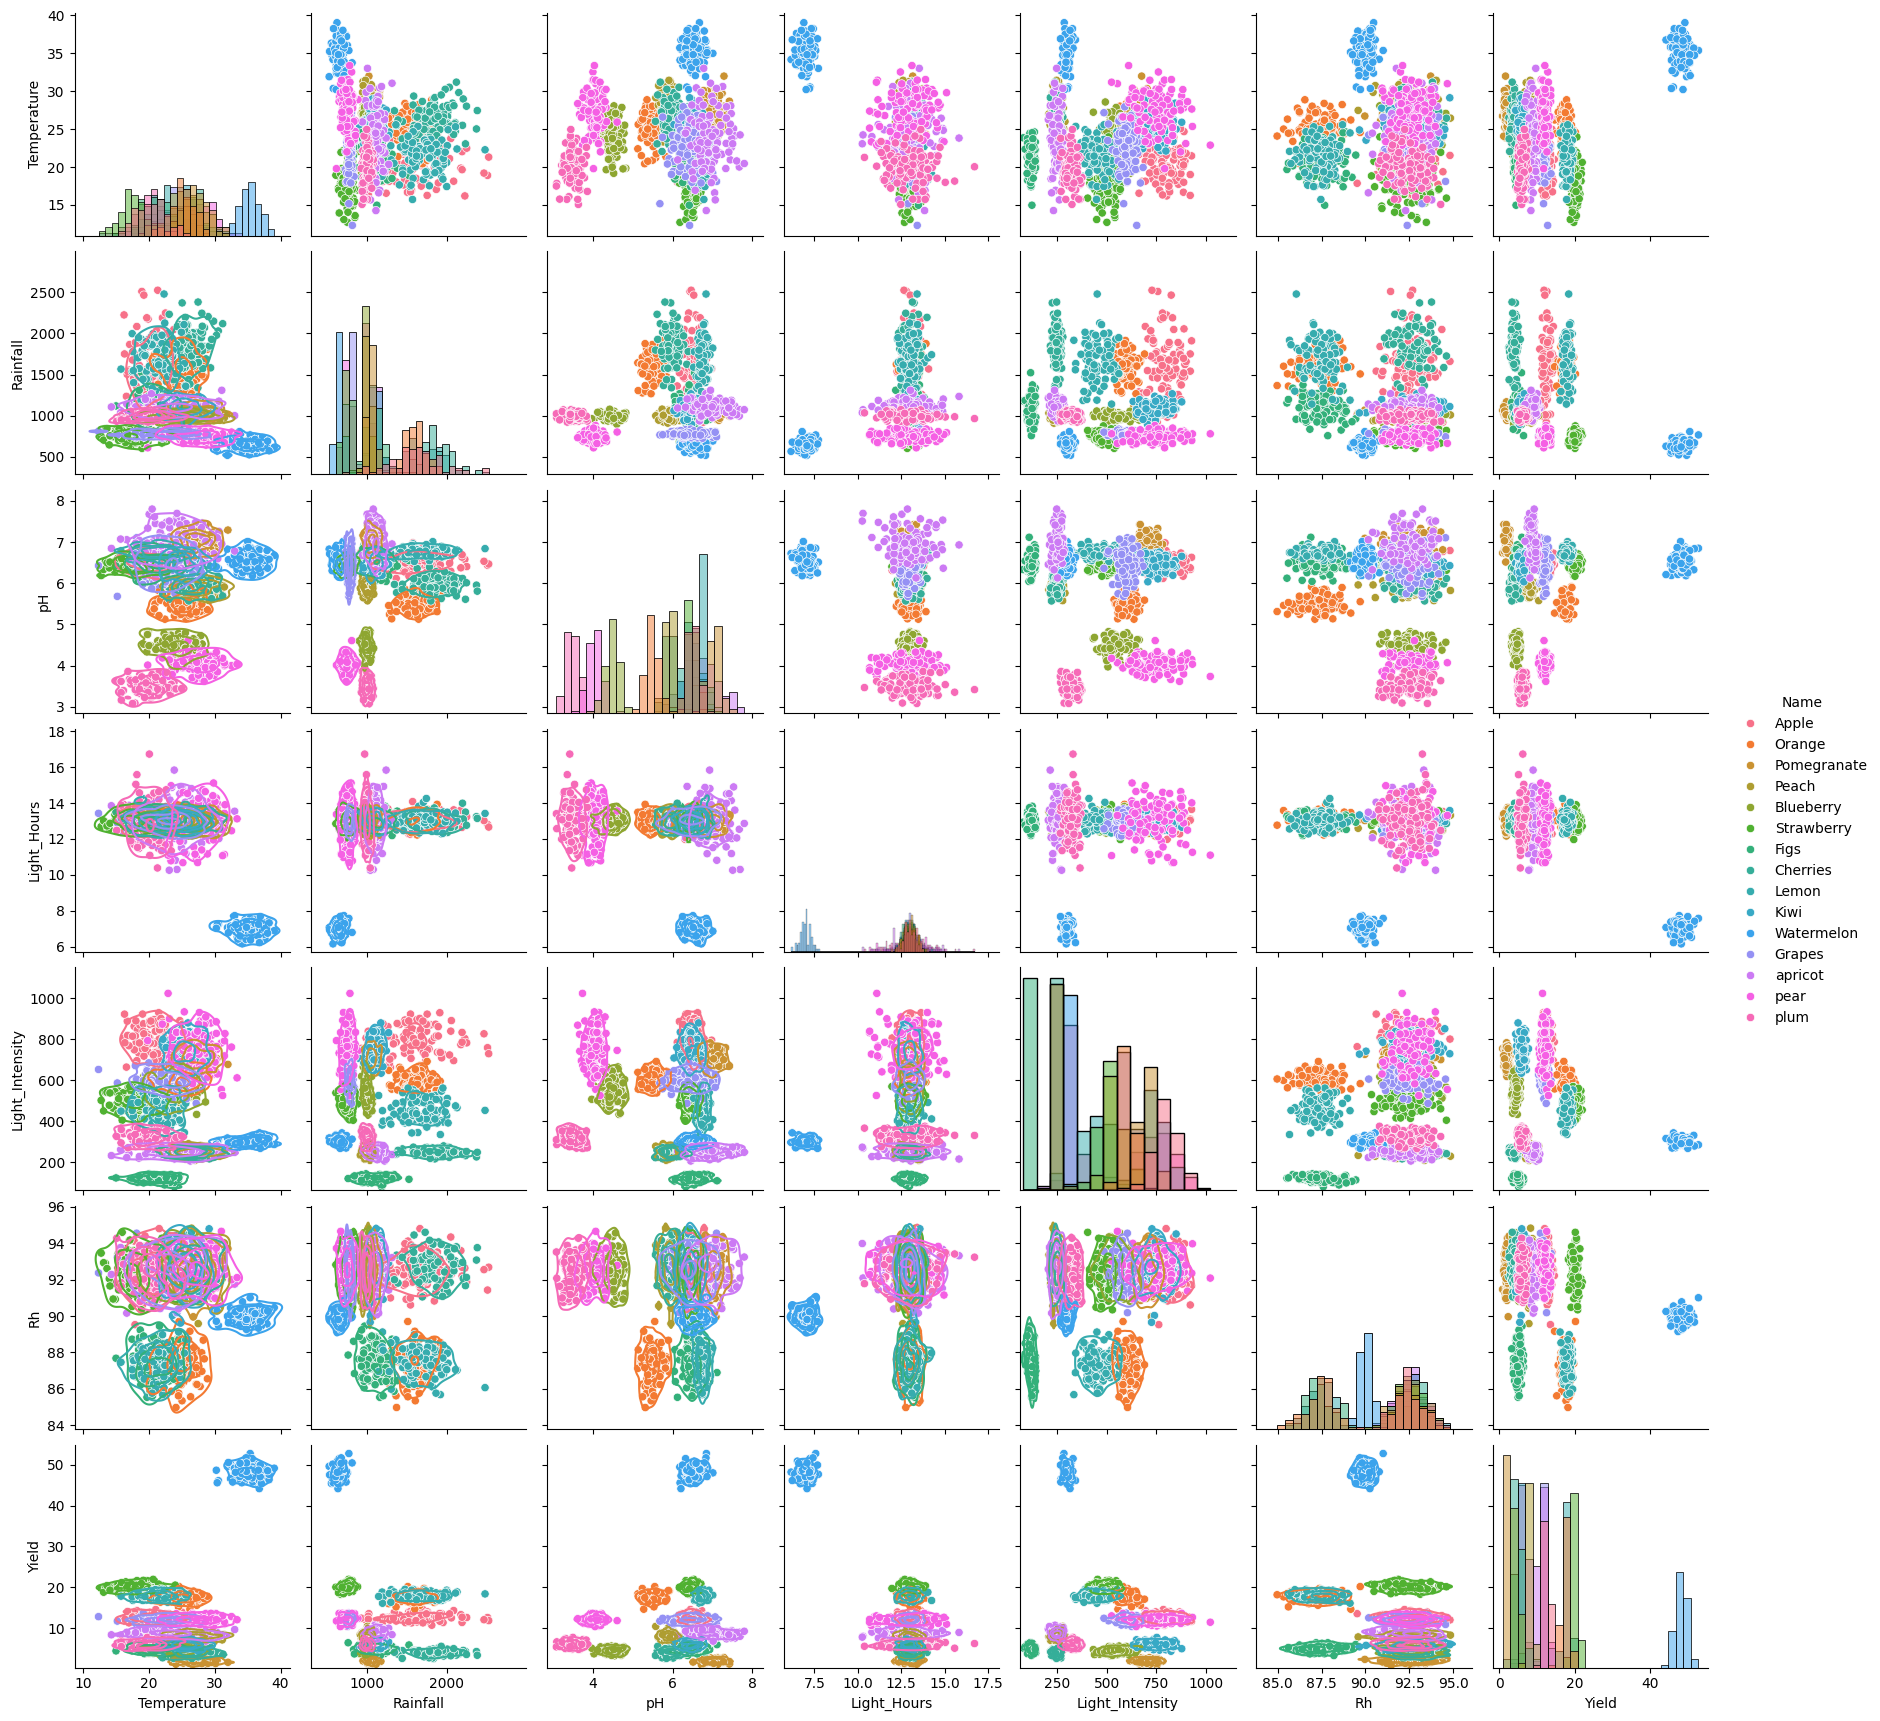

In [ ]:
# sns.pairplot(df, hue="Name", diag_kind="hist")

g = sns.pairplot(df, hue='Name', diag_kind="hist")
g.map_lower(sns.kdeplot, levels=4, color=".2")

## To understand how well the features are related

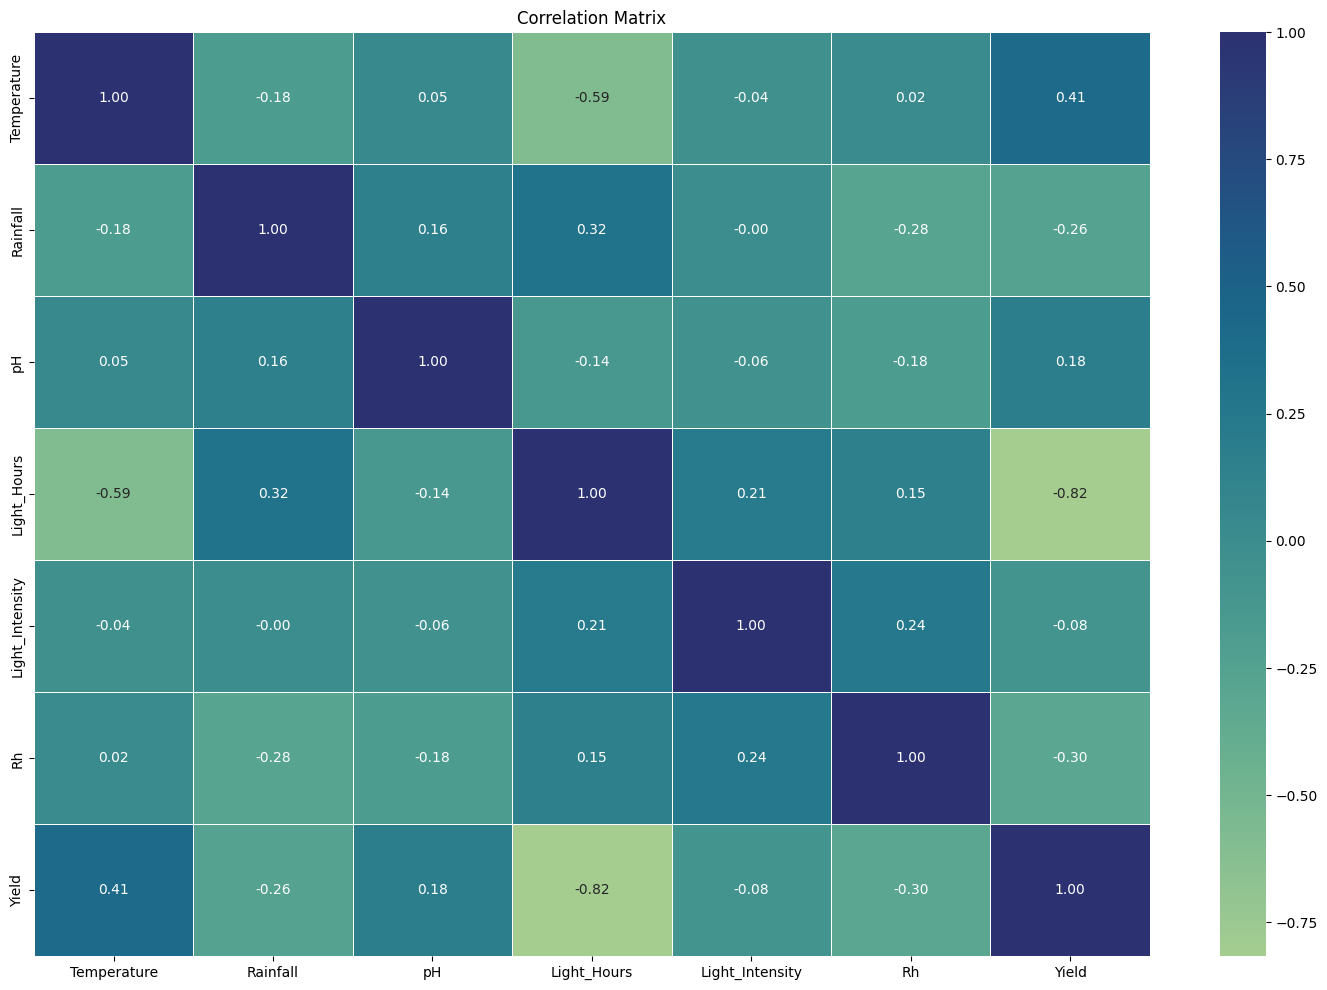

In [ ]:
# Correlation matrix for numerical variables
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

# # Create a mask using numpy's triu function
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Based on the Corelation matrix, we observe that there is
  * positive, but not so strong corelation between Light Hours and Rainfall
  * positive, but not so strong corelation between Temperature and Yield
  * negative corelation between Temperature and Light Hours
  * negative corelation between Rainfall and Yield


## Yield Information for different Crops across Seasons

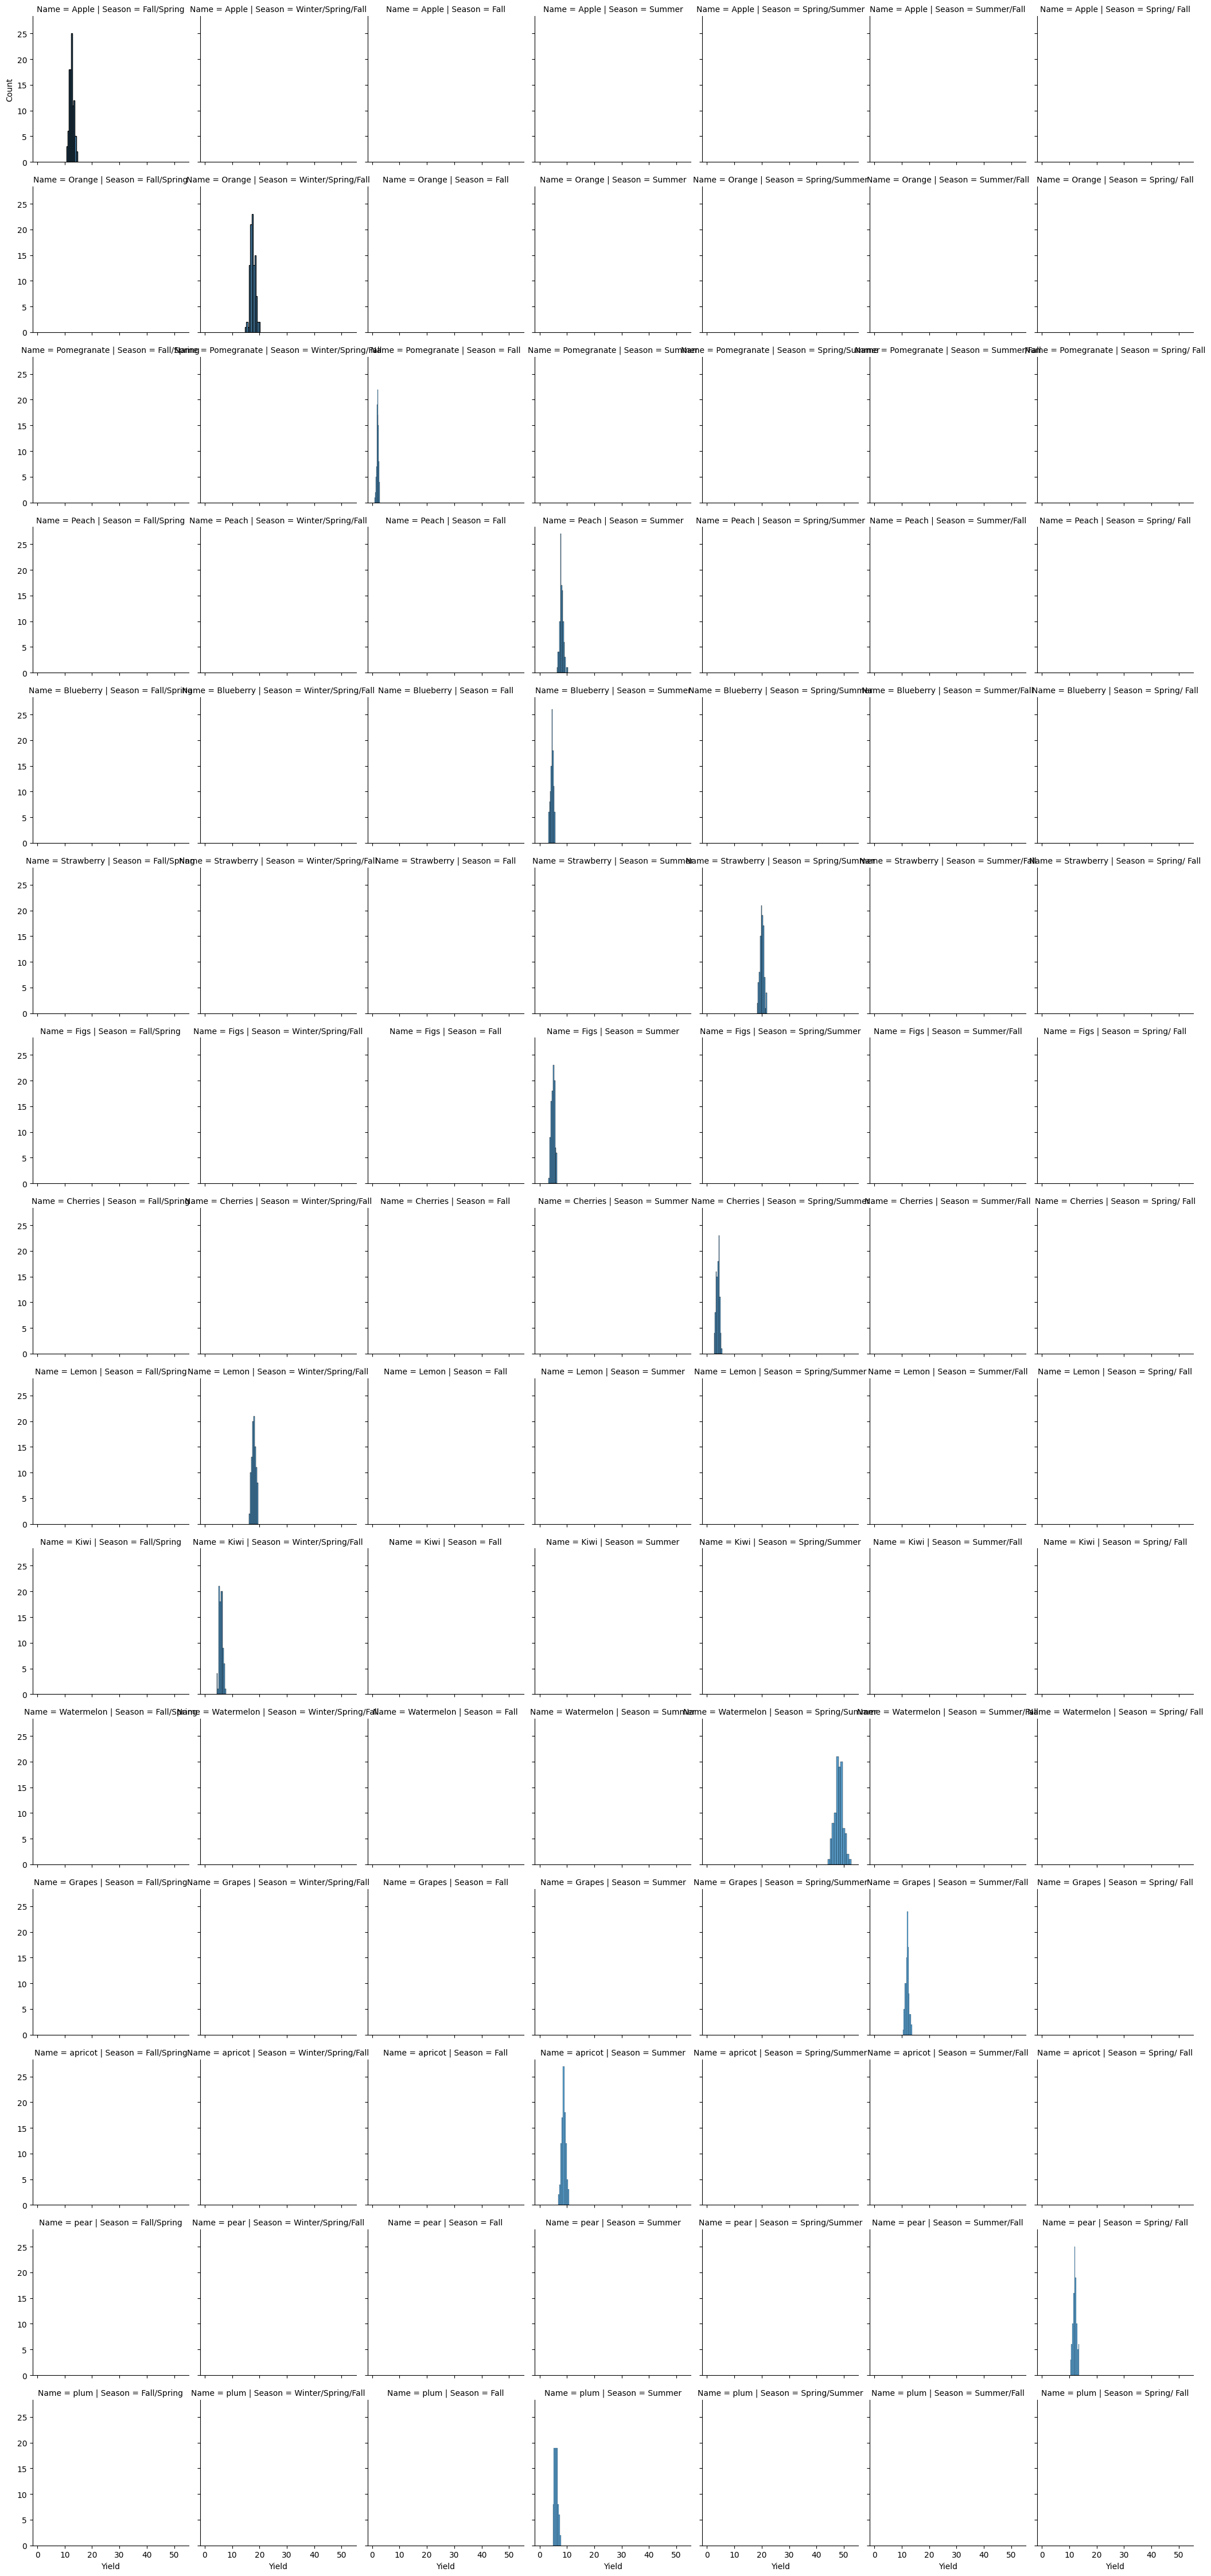

In [ ]:
g = sns.FacetGrid(df, col="Season",  row="Name")
g.map_dataframe(sns.histplot, x="Yield")

## Based on the above plots, we observe that
* Plum, Apricot, Figs, Blueberry, Peach and Watermelons produce high yield during Summer
* Watermelon and Cherries yield are high during Spring and Summer
* Orange, Lemon and Kiwi yield are high during Winter and Fall
* Apple yield are high during Fall and Spring

## Box Plot to Identify Outliers in Numerical Features

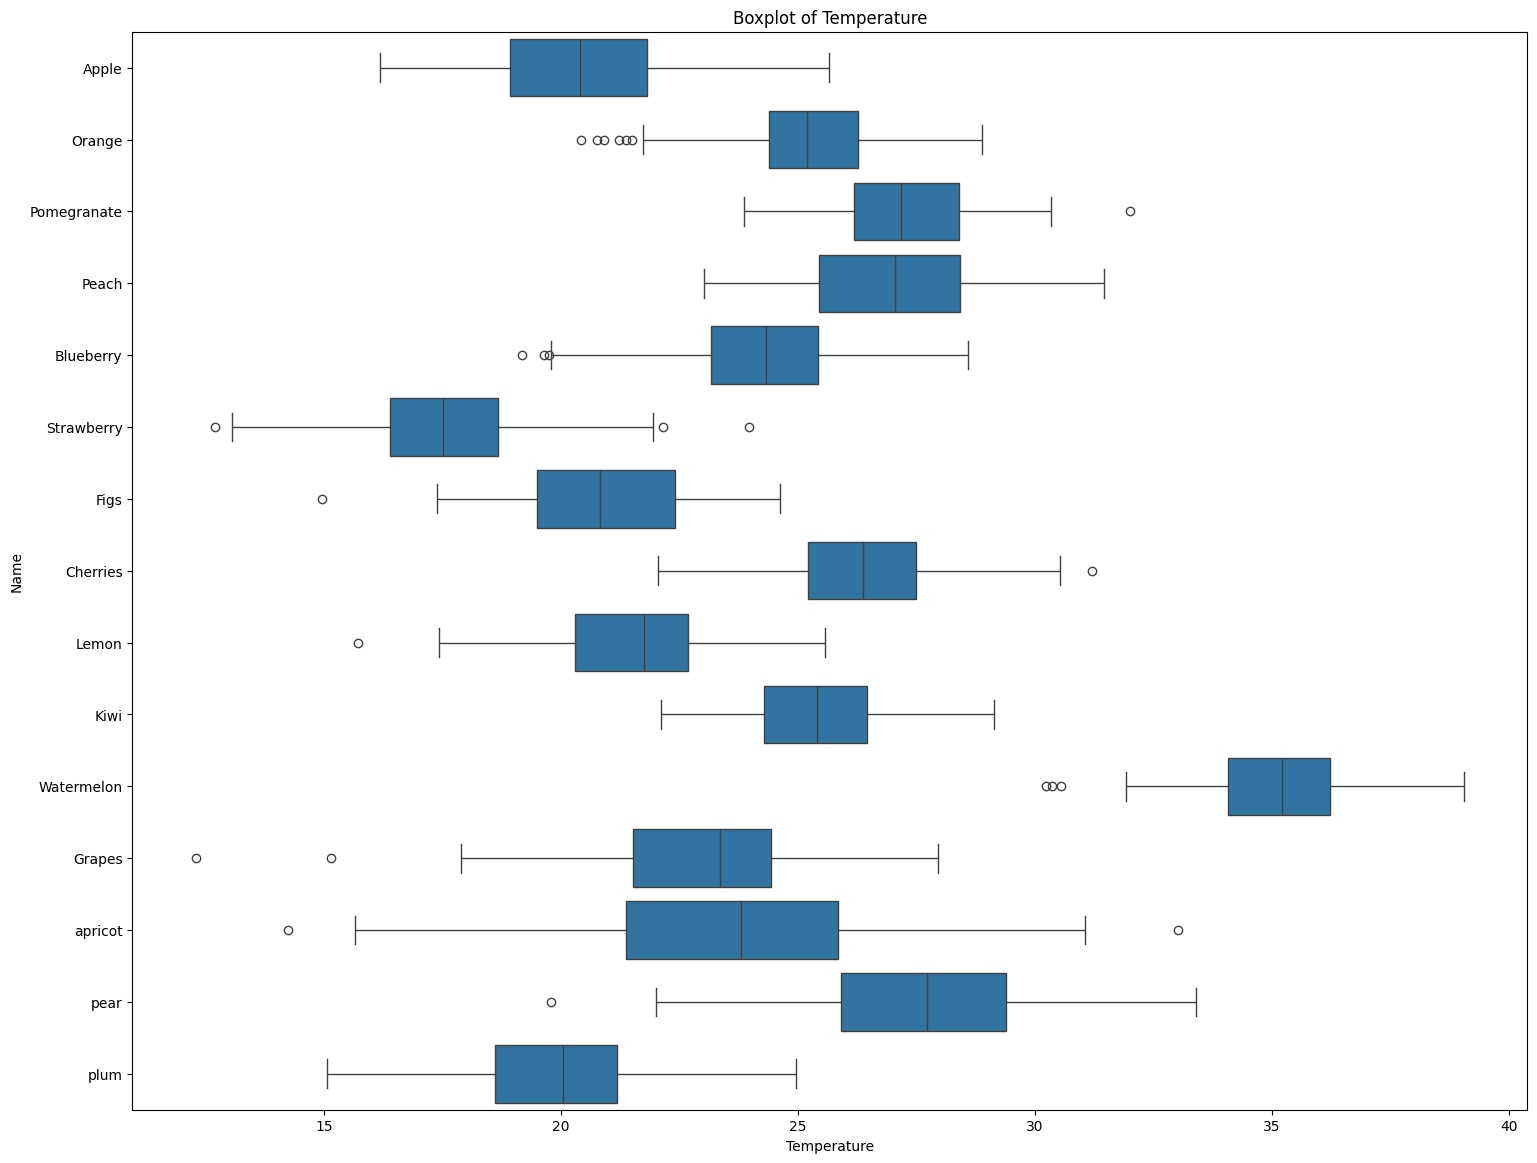

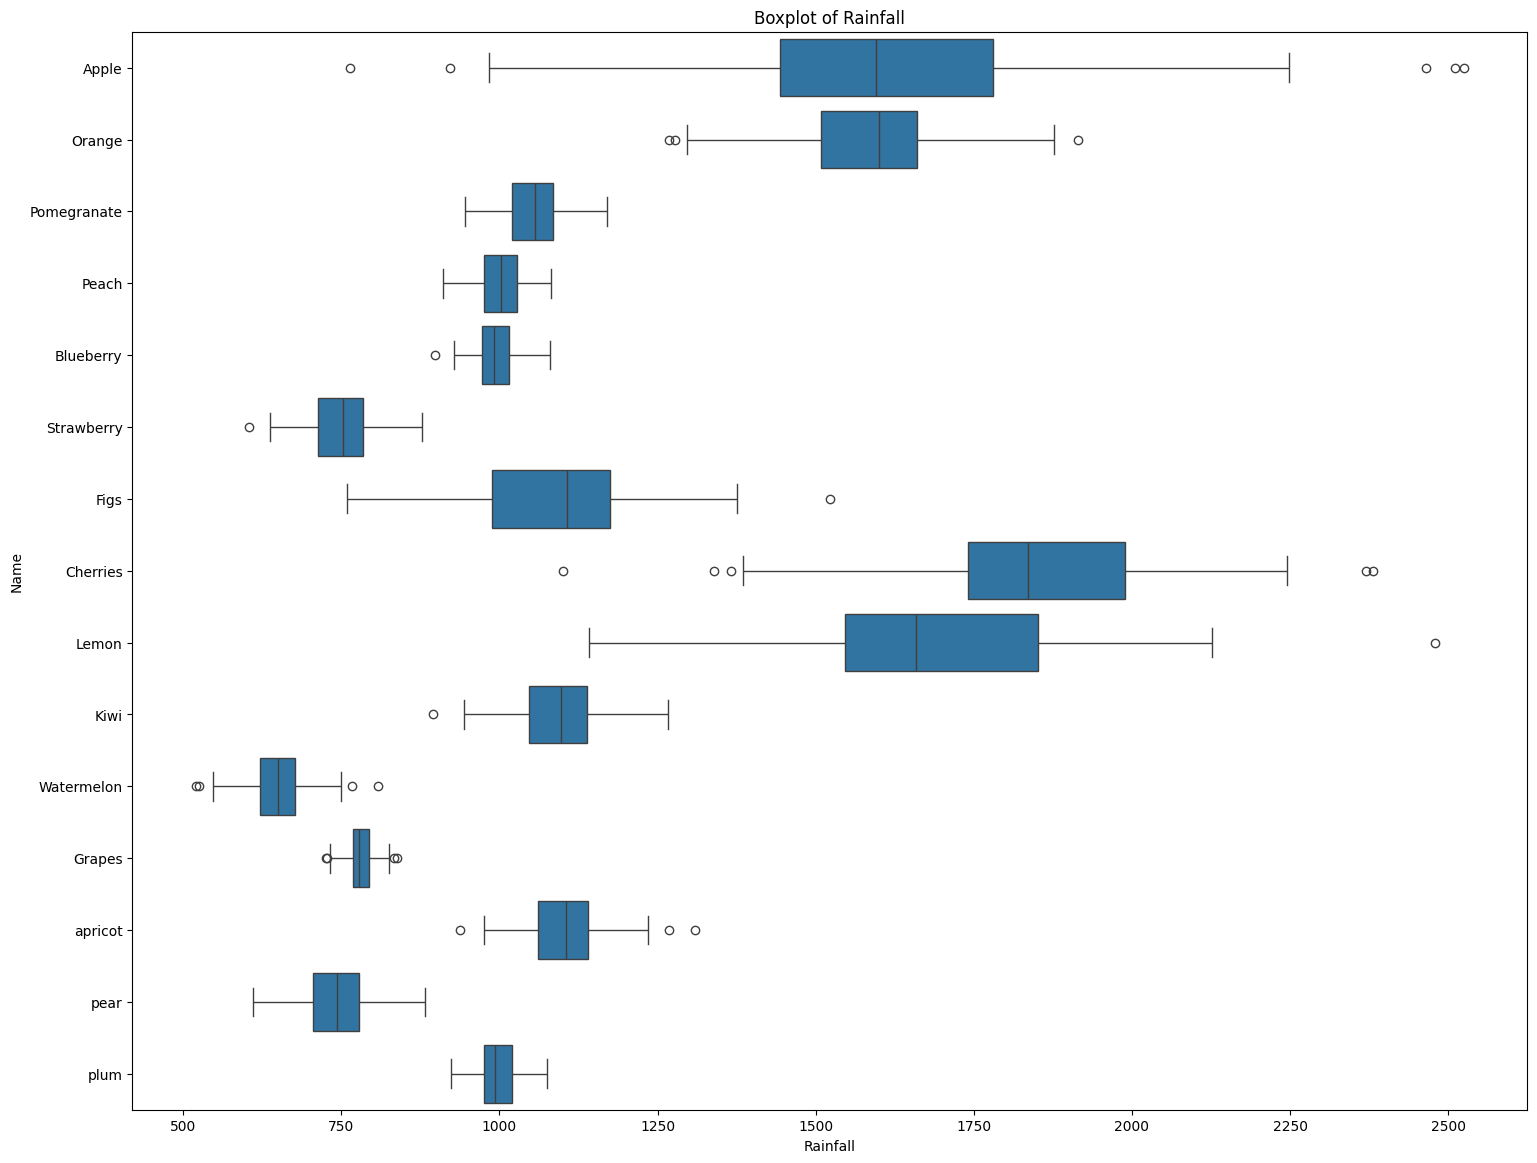

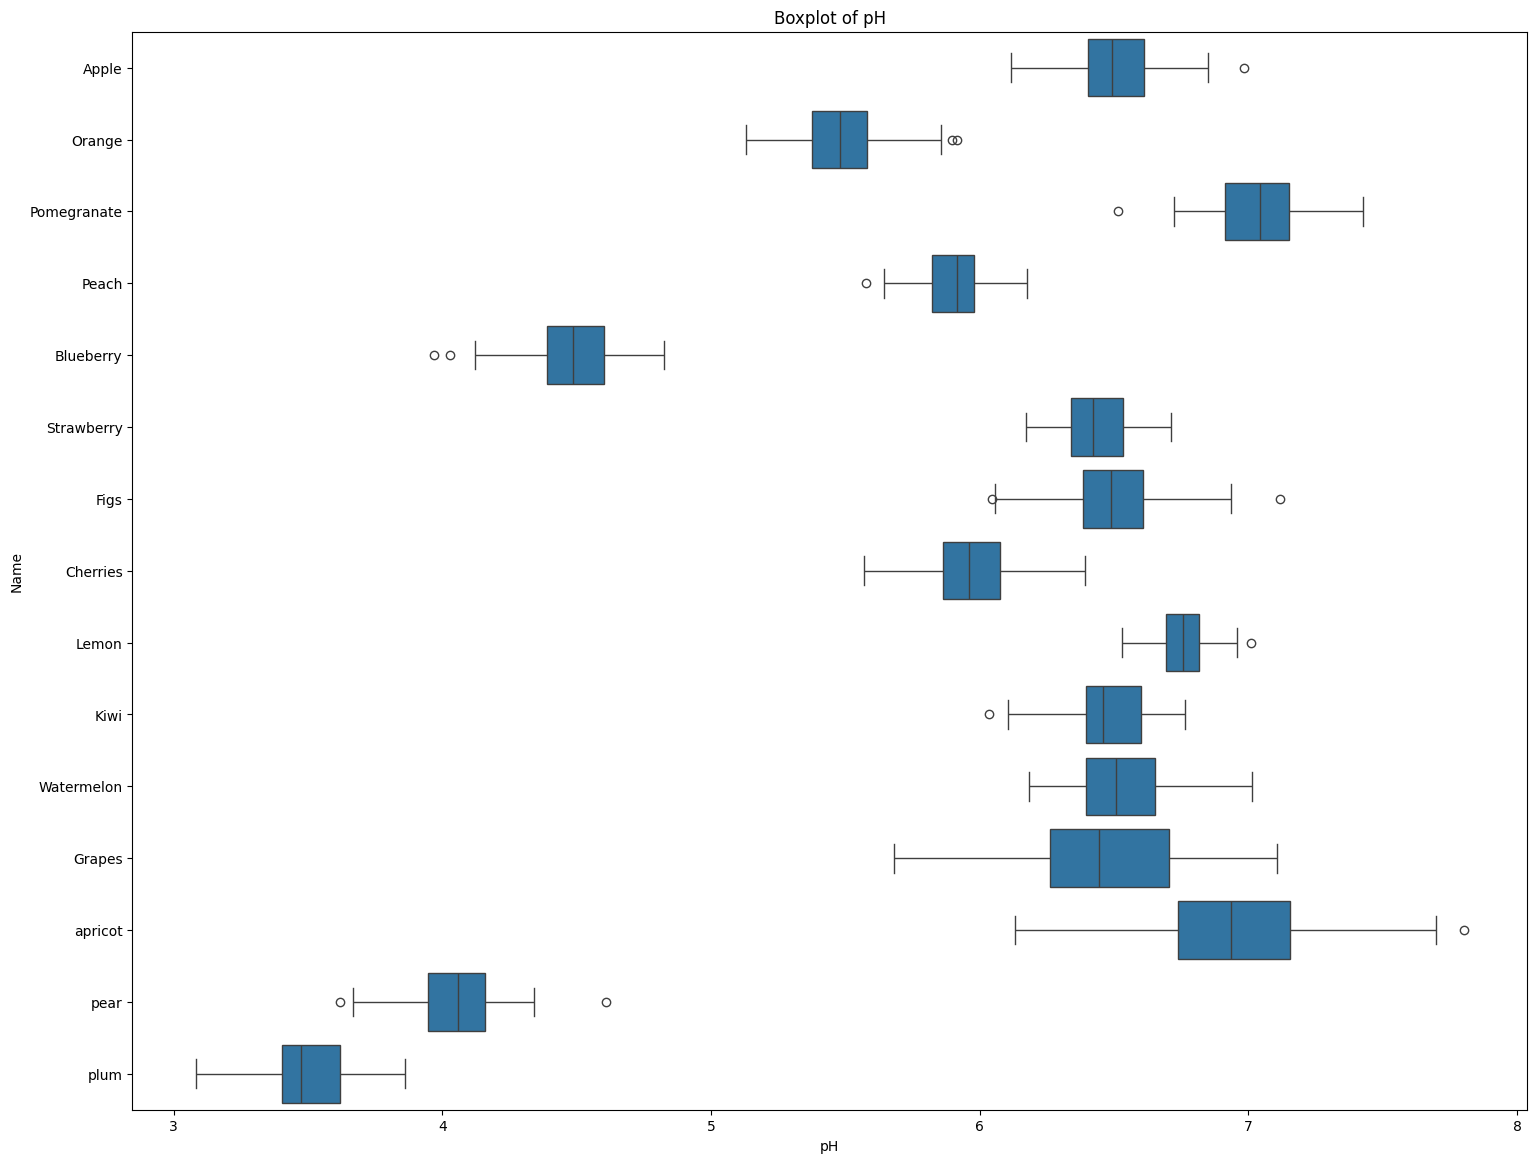

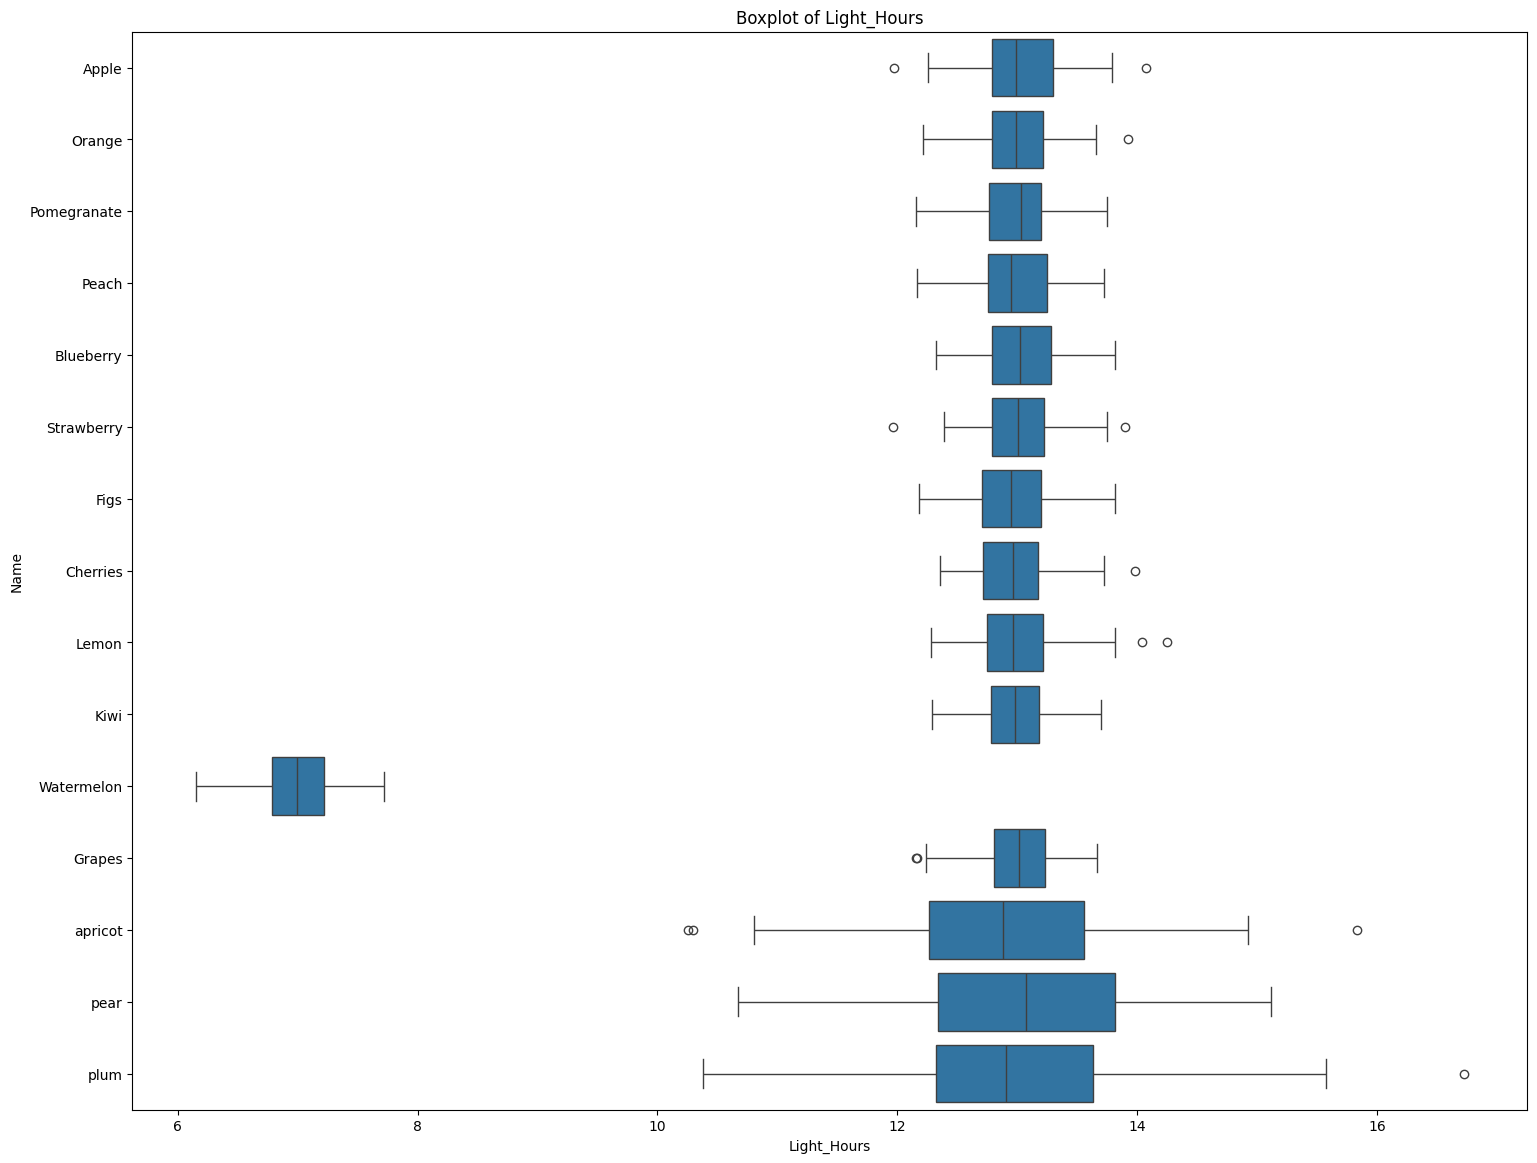

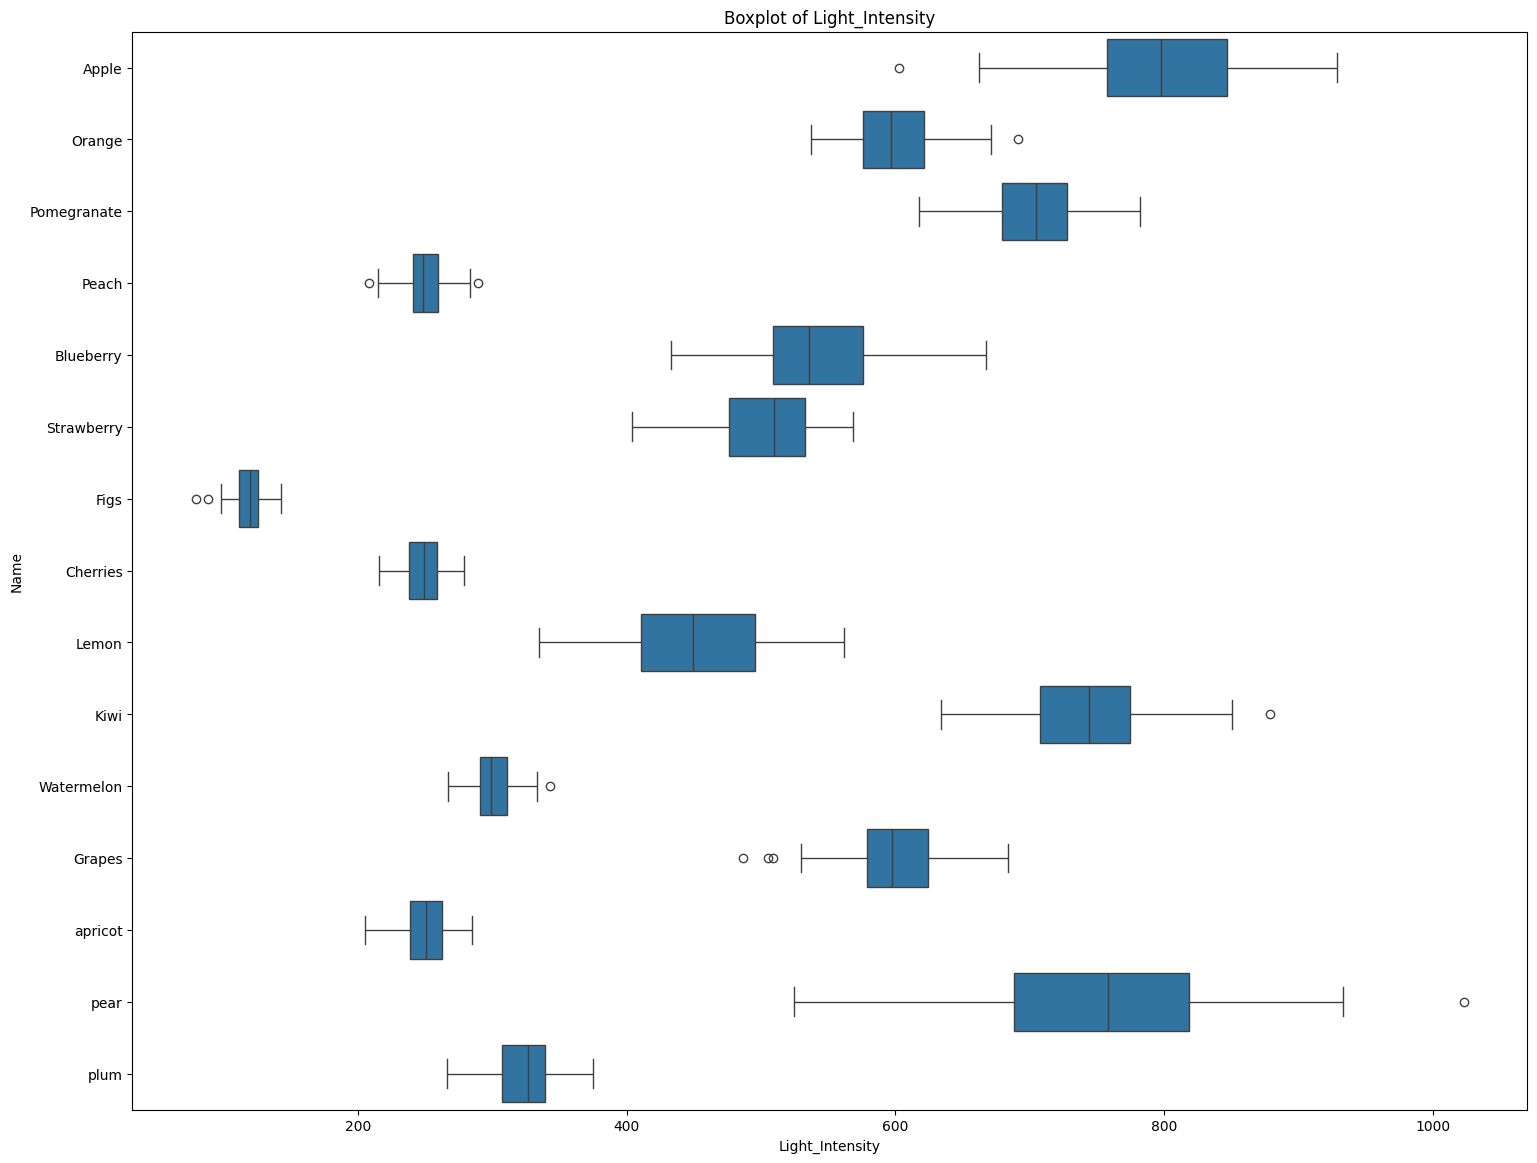

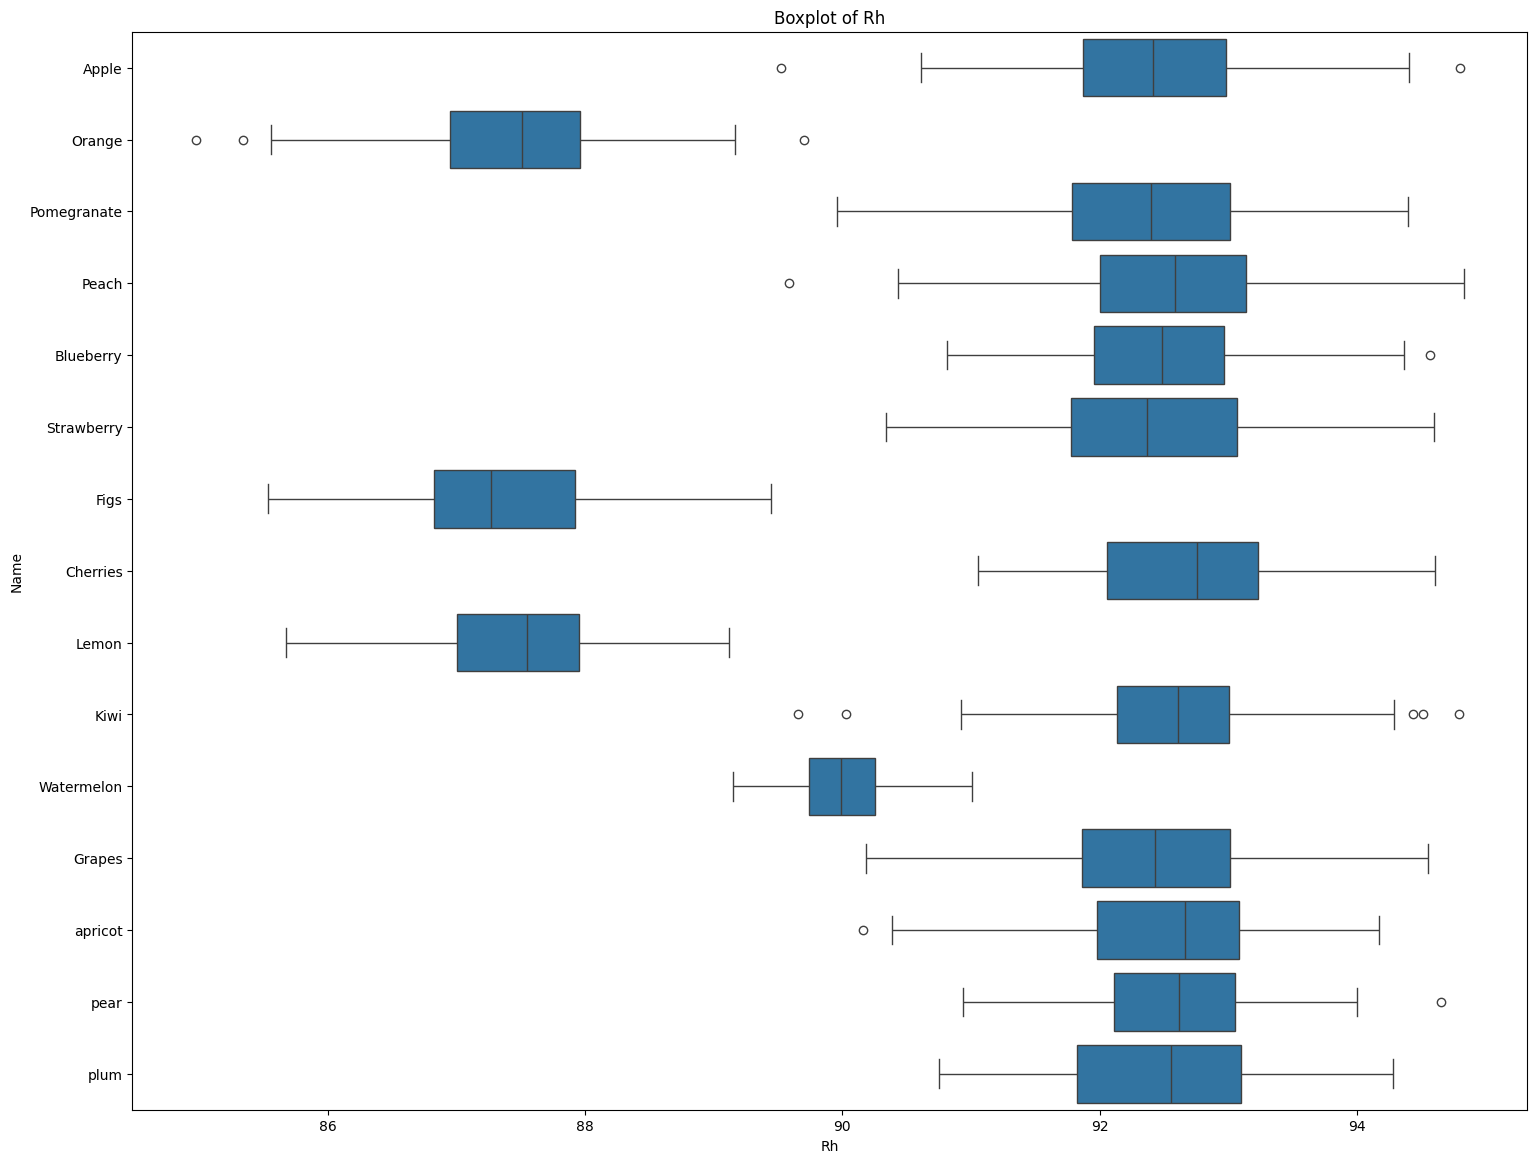

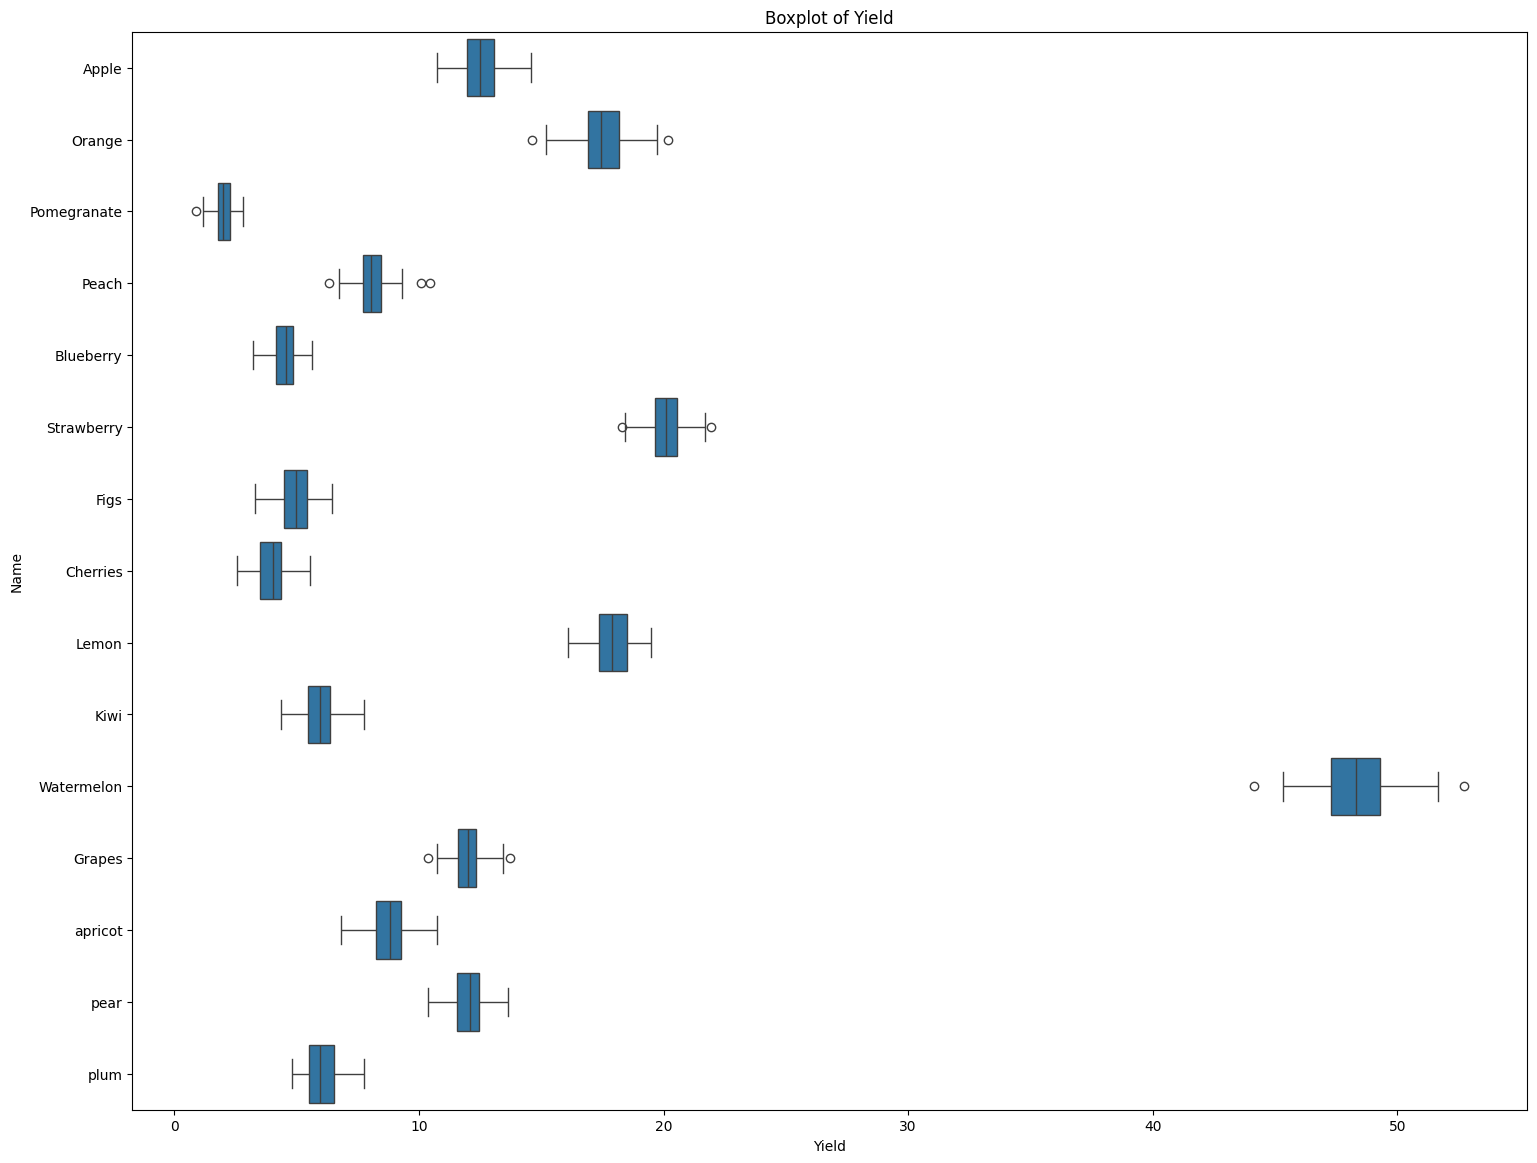

Name           Soil_Type Fertility  \
0     Apple          Sandy Loam      High   
1     Apple          Sandy Loam      High   
2     Apple          Sandy Loam      High   
3     Apple          Sandy Loam      High   
4     Apple          Sandy Loam      High   
...     ...                 ...       ...   
1495   plum  Well-drained Loamy  moderate   
1496   plum  Well-drained Loamy  moderate   
1497   plum  Well-drained Loamy  moderate   
1498   plum  Well-drained Loamy  moderate   
1499   plum  Well-drained Loamy  moderate   

                                         Photoperiod N-P-K Ratio  Temperature  \
0                      Short Day Period, Day Neutral    10-10-10    17.717688   
1                      Short Day Period, Day Neutral    10-10-10    16.182371   
2                      Short Day Period, Day Neutral    10-10-10    20.998417   
3                      Short Day Period, Day Neutral    10-10-10    16.669256   
4                      Short Day Period, Day Neutral    10-10-10    18.198673   
...                                              ...         ...          ...   
1495  Short Day Period, Day Neutral, Long Day Period    10-10-10    17.891333   
1496  Short Day Period, Day Neutral, Long Day Period    10-10-10    21.900411   
1497  Short Day Period, Day Neutral, Long Day Period    10-10-10    20.999432   
1498  Short Day Period, Day Neutral, Long Day Period    10-10-10    21.301396   
1499  Short Day Period, Day Neutral, Long Day Period    10-10-10    18.517100   

         Rainfall        pH  Light_Hours  Light_Intensity         Rh  \
0     1510.650953  6.517575    12.402820       862.448063  94.121236   
1     2225.008000  6.580391    13.435177       803.045261  92.636068   
2     1698.162134  6.449071    13.165403       786.244522  92.220705   
3     1503.549696  6.486605    13.132177       887.589709  92.149099   
4     1670.673667  6.459375    13.301315       845.065760  91.169189   
...           ...       ...          ...              ...        ...   
1495   945.101216  3.412537    12.257946       334.914068  92.022844   
1496  1018.534072  3.410371    11.346310       275.026865  91.896379   
1497  1030.004808  3.721319    12.696267       317.012296  93.758295   
1498   990.134579  3.430827    13.656073       350.917283  91.181606   
1499  1017.625940  3.432805    14.562903       299.905705  92.590923   

          Yield       Season  Temperature_zscore  Rainfall_zscore  pH_zscore  \
0     12.727285  Fall/Spring           12.446899      1507.719811   0.965127   
1     12.530529  Fall/Spring           10.911582      2222.076858   1.027943   
2     14.563788  Fall/Spring           15.727628      1695.230992   0.896623   
3     11.645299  Fall/Spring           11.398466      1500.618553   0.934157   
4     12.098812  Fall/Spring           12.927884      1667.742524   0.906927   
...         ...          ...                 ...              ...        ...   
1495   5.075168       Summer           12.620544       942.170074  -2.139911   
1496   5.650500       Summer           16.629622      1015.602930  -2.142077   
1497   6.061712       Summer           15.728642      1027.073666  -1.831128   
1498   7.070557       Summer           16.030607       987.203437  -2.121621   
1499   5.467124       Summer           13.246310      1014.694798  -2.119643   

      Light_Hours_zscore  Light_Intensity_zscore  Rh_zscore  Yield_zscore  
0               4.510080              860.237754  52.619179     11.609468  
1               5.542436              800.834951  51.134011     11.412712  
2               5.272663              784.034213  50.718648     13.445971  
3               5.239437              885.379400  50.647042     10.527481  
4               5.408575              842.855451  49.667132     10.980995  
...                  ...                     ...        ...           ...  
1495            4.365205              332.703758  50.520787      3.957351  
1496            3.453570              272.816555  50.394322

In [ ]:
# Plot to detect Outliers and also Calculate the ZScores
for col in numerical_columns:
    col_zscore = col + "_zscore"
    df[col_zscore] = df[col] - df[col].mean()/df[col].std(ddof=0)
    plt.figure(figsize=(18, 14))
    sns.boxplot(data=df, x=col, y='Name')
    plt.title(f'Boxplot of {col}')
    plt.show()


df




## There are some outliers observed for almost all features for different crops, handling of outliers need to be further analysed

## Analyse Corelation between features and target(Yield)

In [ ]:
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    df[col] = df[col].astype('category').cat.codes


# Corelation between Yield and all other features
df[df.columns[1:]].corr()['Yield'][:]

Soil_Type                 0.365500
Fertility                -0.165287
Photoperiod              -0.557826
N-P-K Ratio              -0.191347
Temperature               0.410310
Rainfall                 -0.258087
pH                        0.181522
Light_Hours              -0.816600
Light_Intensity          -0.084578
Rh                       -0.301940
Yield                     1.000000
Season                    0.051120
Temperature_zscore        0.410310
Rainfall_zscore          -0.258087
pH_zscore                 0.181522
Light_Hours_zscore       -0.816600
Light_Intensity_zscore   -0.084578
Rh_zscore                -0.301940
Yield_zscore              1.000000
Name: Yield, dtype: float64

* From above, Positive corelation is observed between Yield and Temperature/Soil Type